# **1. Introduction**

In the competitive landscape of financial services, effectively managing and increasing customer deposits is crucial for sustaining growth and profitability. One effective approach to achieve this is by leveraging data analytics to inform and optimize marketing strategies. This report aims to enhance the success rate of deposit campaigns by 25% in the next quarter through a comprehensive analysis of previous campaign data. The insights derived from this analysis will guide the formulation of targeted marketing strategies, ultimately leading to increased customer deposits.




# **2. Problem Identification**

### **SMART Framework Identification**

To ensure our objective is clearly defined and achievable, we utilize the SMART framework:

- **Specific:** Increase the success rate of deposits after campaigns by conducting a comprehensive analysis of previous campaign results.
- **Measurable:** Increase the success rate of long-term deposit campaigns by 25%.
- **Achievable:** Based on the results of the previous quarter's deposit campaign, it is feasible to increase the customer deposit rate by 25%.
- **Relevant:** Analyzing the results of previous campaigns can help formulate new strategies to increase deposits in the upcoming campaign.
- **Time Bound:** Increase the success rate of adding customer deposits in the next quarter by implementing strategies derived from the analysis of previous campaign data.

### **Problem Statement**

Increase the success rate of the deposit campaign in the next quarter by 25% through analyzing data from previous campaigns.

### **Defining the Problem**

To achieve our objective, we need to address several key questions through data analysis:

1. **Age Range Analysis:** What is the age range of customers who are likely to make long-term deposits?
2. **Occupation Influence:** How does a customer's occupation influence their decision to subscribe to term deposits?
3. **Optimal Campaign Timing:** Which month is suitable for the next campaign?
4. **Impact of Previous Campaigns:** How do the results of previous marketing campaigns affect customers' decisions to subscribe to term deposits?
5. **Balance Influence:** Does a customer's balance influence their likelihood to make long-term deposits?
6. **Marital Status Correlation:** What is the relationship between a customer's marital status and the likelihood of making term deposits?
7. **Education and Balance Comparison:** How does education level compare to account balance in relation to the likelihood of making term deposits?
8. **Age and Last Contact Duration:** How do age and the duration of the last contact compare to the likelihood of making term deposits?
9. **Age and Balance Correlation:** What is the correlation between age and balance for targeting customers in the next deposit campaign?

By addressing these questions, we can uncover actionable insights that will inform our campaign strategies. 

### **Data Source**

The dataset used for this analysis can be accessed [here](https://www.kaggle.com/datasets/seanangelonathanael/bank-target-marketing/data). This dataset contains information about marketing campaigns includes data on customer demographics, behaviors, and previous campaign outcomes.

### **Visualization and Analysis Tool**

To effectively analyze and visualize the data, I use Tableau. Tableau is a powerful data visualization tool that allows for interactive, insightful analysis. You can access our Tableau dashboard [here](https://public.tableau.com/shared/MDZDNXN5H?:display_count=n&:origin=viz_share_link).

Through this structured approach, I aim to develop data-driven strategies that will significantly enhance the success rate of deposit campaigns.

# **3. Data Loading**

## 3.1 - Import Libraries

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

## 3.2 - Load Data

In [2]:
df = pd.read_csv('Bank Target Marketing Dataset.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Data successfully displayed

## 3.3- Check data

In [3]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB


Bank Target Marketing data consists of 17 columns and 56373 rows 

In [4]:
# Check missing value on dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There is no missing value on dataset

In [5]:
# Check duplicated data on dataset
df.duplicated().sum()

11162

The data contains duplicated data and must be dropped

# **4. Data Cleaning**

## 4.1 - Drop Data Duplicated

In [8]:
# Drop duplicated data
df.drop_duplicates(inplace=True)

In [10]:
# Check duplicated data after drop
df.duplicated().sum()

0

Data succsesfully drop duplicates

## 4.2 - Replace Symbol

### 4.2.1- Replace symbol (. and -) from the text

In [7]:
# Replace some symbols in the data such as (. and -)
df['job'] = df['job'].str.replace('.','')
df['job'] = df['job'].str.replace('-',' ')

In [10]:
# Check unique values on column `job`
df['job'].unique()

array(['admin', 'technician', 'services', 'management', 'retired',
       'blue collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self employed', 'student'], dtype=object)

Data has been successfully cleaned

## 4.3- Save Data

In [11]:
# Save cleaned data to csv
df.to_csv('bank_target_marketing_cleaned.csv', index=False)

In [12]:
# Read data cleaned
df = pd.read_csv('bank_target_marketing_cleaned.csv')

# **5. Exploratory Data Analysis (EDA)**

### 5.1 - What is the age range of customers who are likely to make long-term deposits?

In [13]:
# Check describe about the data
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [14]:
# Check age range of bank customers
range = df['age'].max() - df['age'].min()
print('The age range of all bank customers is',range)
print('Starting from age', df['age'].min(), 'up to age', df['age'].max())

The age range of all bank customers is 77
Starting from age 18 up to age 95


In [15]:
# Search for possible customer age ranges for deposits with Quartile values
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.5)
q3 = df['age'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)
print('Lower boundaries', q1-1.5*iqr)
print('Upper boundaries', q3+1.5*iqr)

Q1: 33.0
Q2: 39.0
Q3: 48.0
Interquartile Range (IQR): 15.0
Lower boundaries 10.5
Upper boundaries 70.5


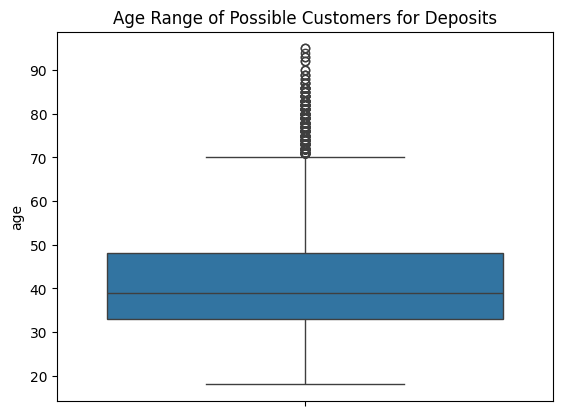

In [16]:
# Age range box plot
sns.boxplot(y=df['age']);
plt.title('Age Range of Possible Customers for Deposits');

Based on the age range of all customers' data, it is found that the age range of 33-48 years old is most likely to make deposits. This is because this range covers most of the data and reflects the significant age variation among customers.

### 5.2 - How does a customer's occupation influence their decision to subscribe to term deposits?

H0 : Customer employment does not affect the decision to subscribe to time deposits.

H1 : Customer occupation affects the decision to subscribe to time deposits.

In [17]:
# Contingency Table 
contingency_table = pd.crosstab(df['job'],df['deposit'])
contingency_table

deposit,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [18]:
# Calculating the p-value to determine the relationship between the two
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 3.337121944935502e-172


With a critical value = 0.05, the p-value is less than the critical value. Therefore, H0 is successfully rejected and H1 is accepted. So, the customer's occupation affects the decision for long-term deposits.

### 5.3 - Which month is suitable for the next campaign?

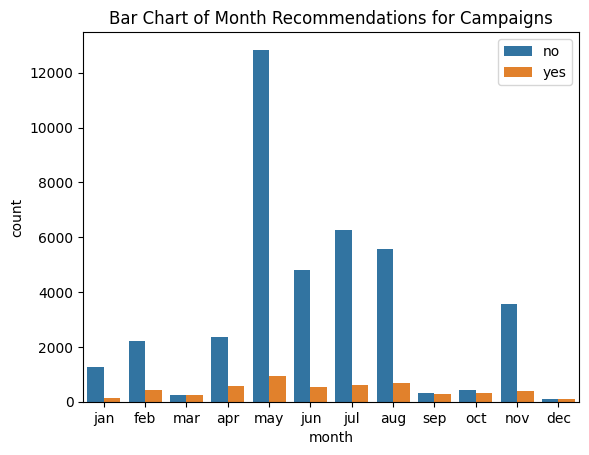

In [19]:
# Bar chart for next campaign month recommendation
bulan_campaign = df.groupby(['month','deposit'])['day'].value_counts().reset_index()
bulan = bulan_campaign.groupby(['month','deposit'])['count'].sum().reset_index()
Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.barplot(data=bulan, x='month', y='count', orient='v', hue='deposit',  err_kws={'linewidth': 0}, order = Months )
plt.legend(bbox_to_anchor=(1,1))
plt.title('Bar Chart of Month Recommendations for Campaigns')
plt.show()

Based on this data, the recommended month for the next campaign can be done in May, because in that month customers can be reached through communication more easily.

### 5.4 - How do the results of previous marketing campaigns affect customers' decisions to subscribe to term deposits?

H0 : Marketing campaign results do not affect customer decisions for time deposits

H1 : The results of the marketing campaign affect customer decisions for time deposits

In [23]:
# Cntingency Table
contingency_table = pd.crosstab(df['poutcome'],df['deposit'])
contingency_table

deposit,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


In [41]:
# Count p-value
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.0


The p-value is 0, which means the p-value is less than 0.05, i.e. H0 fails to be rejected. So, the results of the marketing campaign did not influence the customer's decision to make a time deposit.

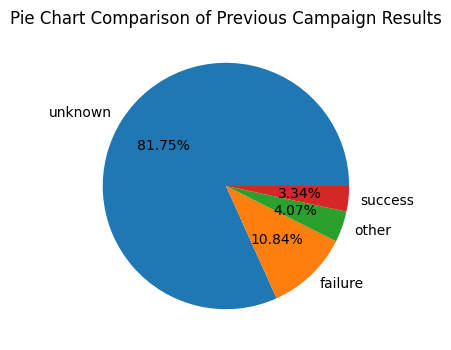

In [20]:
# Pie chart of previous campaign results
fig,ax1 = plt.subplots(figsize=(4,4))

df['poutcome'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
ax1.set_title('Pie Chart Comparison of Previous Campaign Results')
ax1.set_ylabel('')
plt.show()

Based on the pie chart, it shows that 81.75% of the customers are not known to have taken a term deposit after the previous campaign.

### 5.5 - Does a customer's balance influence their likelihood to make long-term deposits?

In [21]:
# Check the correlation of customer balances with deposits using Kendall correlation analysis
corr_tau, pval_k = stats.kendalltau(df['balance'], df['deposit'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.08, p-value: 6.593766790554273e-101


The results show that the correlation between customer balances to make time deposits is real, as the p-value found is less than 0.05 and the correlation is positive.

### 5.6 - What is the relationship between a customer's marital status and the likelihood of making term deposits?

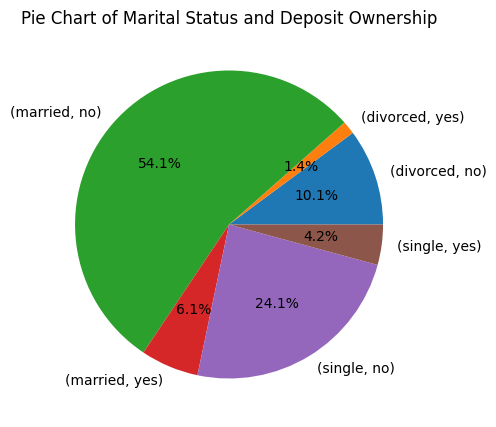

In [22]:
# Create a pie chart of comparison between customer status and deposits
fig, ax1 = plt.subplots(figsize=(5, 5))

status = df.groupby(['marital', 'deposit']).size()
status.plot(kind='pie', autopct='%1.1f%%', ax=ax1)

ax1.set_title('Pie Chart of Marital Status and Deposit Ownership')
ax1.set_ylabel('')
plt.show()

Based on this diagram, customers who have deposit ownership are mostly married customers. 

### 5.7 - How does education level compare to account balance in relation to the likelihood of making term deposits?

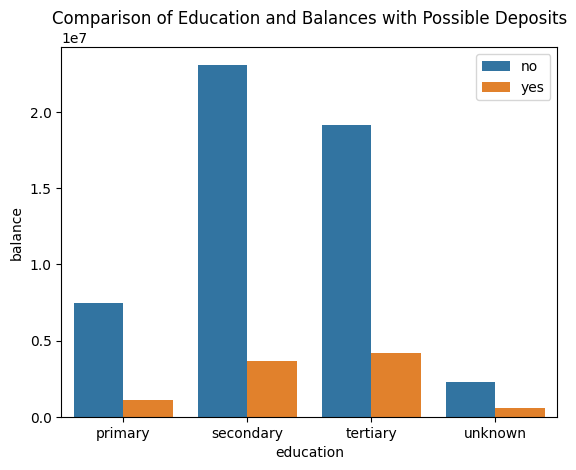

In [23]:
# Bar plot of education against balance with deposit
edu = ['primary','secondary','tertiary','unknown']
pendidikan = df.groupby(['education','deposit'])['balance'].sum().reset_index()

sns.barplot(data=pendidikan, x='education', y='balance', orient='v', hue='deposit',  err_kws={'linewidth': 0} )
plt.legend(bbox_to_anchor=(1,1))
plt.title('Comparison of Education and Balances with Possible Deposits')
plt.show()

Based on the diagram, customers who have the largest deposit ownership are customers whose education level is tertiary.

### 5.8 - How do age and the duration of the last contact compare to the likelihood of making term deposits?

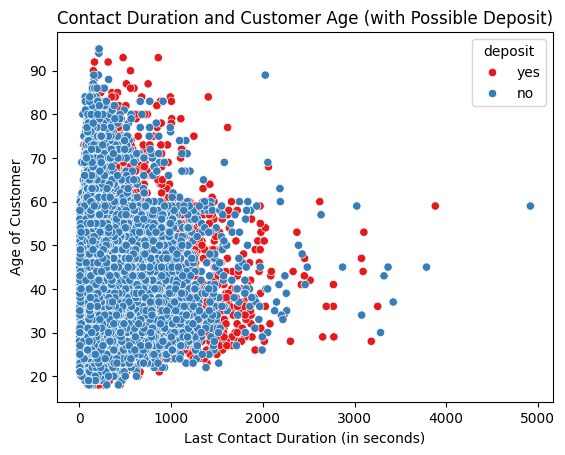

In [24]:
# Scatter plot comparing age and duration of last contact with likelihood of deposit
sns.scatterplot(data=df, x='duration', y='age', hue='deposit', palette='Set1')
plt.title('Contact Duration and Customer Age (with Possible Deposit)')
plt.xlabel('Last Contact Duration (in seconds)')
plt.ylabel('Age of Customer')
plt.show()

Based on the table, the longer the duration of the last contact of the customer is likely to make a deposit, and based on the diagram, the smaller the age of the customer, the more likely it is to make a deposit.

### 5.9 - What is the correlation between age and balance for targeting customers in the next deposit campaign?

In [34]:
corr_r, pval_p = stats.pearsonr(df['age'], df['balance'])
print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")  

r-correlation: 0.10, p-value: 1.8469874948655115e-96


The results show that the correlation between age and customer balance is real, as the p-value found is less than 0.05 and the correlation is positive.

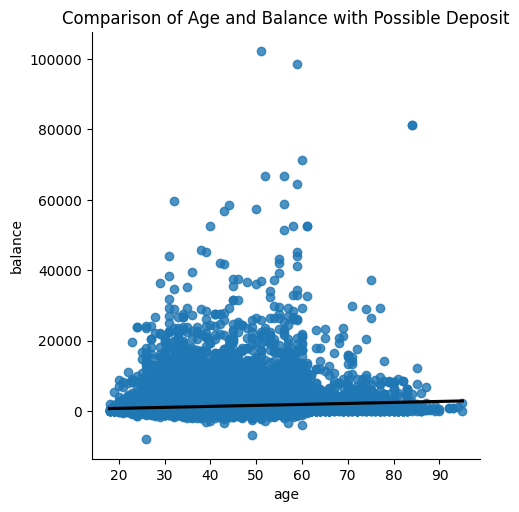

In [25]:
sns.lmplot(data=df,x='age', y='balance', line_kws={'color': 'black'});
plt.title('Comparison of Age and Balance with Possible Deposit');

# **6. Conclusion**

Based on the data analysis, adjusting the next campaign according to the findings can potentially increase the likelihood of customers making deposits by 25%, up from the initial 3.34%. The data indicates that campaigns conducted in May receive significant customer attention. The target demographic will focus on customers aged between 33 to 48 years old. Comparing several factors such as balance, occupation, last contact duration, and marital status:

- Customers with larger balances are highly likely to make term deposits.
- Customers with permanent jobs are more inclined to take term deposits.
- Active and reachable customers are highly likely to be interested in term deposits through the campaign.
- Married customers are significantly more likely to take term deposits based on the data

